In [3]:
# Import the required Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the Excel file
file_path = "DF Data.xlsx"
data = pd.read_excel(file_path)

In [5]:
# Displaying the Data Details.
data.describe()

,Check box if it is a Risk.,Probability [1-Low/5 Certain],Impact [1-Low/5 Critical],Severity,Cost Impact Score,Cost Impact Matrix 2,Date of Resolution,Progress Update,Progress Updated Tracking,Date Closed
count,0.0,36.000000,36.000000,90.000000,36.000000,2.500000e+01,0.0,0.0,90,0.0
mean,NaN,2.222222,2.527778,2.266667,2.555556,1.176000e+06,NaN,NaN,2024-05-22 08:13:34.855555584,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,1.000000e+04,NaN,NaN,2024-05-08 16:54:27,NaN
25%,NaN,1.000000,2.000000,0.000000,2.000000,1.500000e+05,NaN,NaN,2024-05-08 16:54:27,NaN
50%,NaN,2.000000,3.000000,0.000000,3.000000,6.000000e+05,NaN,NaN,2024-05-22 09:21:47,NaN
75%,NaN,3.000000,3.000000,4.000000,3.000000,1.800000e+06,NaN,NaN,2024-05-31 12:55:10.750000128,NaN
max,NaN,5.000000,4.000000,12.000000,4.000000,5.000000e+06,NaN,NaN,2024-06-07 14:24:30,NaN
std,NaN,1.098339,0.970600,3.430858,0.969372,1.382106e+06,NaN,NaN,NaN,NaN


In [9]:
# Displaying the Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Check box if it is a Risk.      0 non-null      float64       
 1   Row ID                          90 non-null     object        
 2   Risk Category                   65 non-null     object        
 3   Short Tile                      65 non-null     object        
 4   Definition (What is the Risk?)  63 non-null     object        
 5   What is the Cause?              55 non-null     object        
 6   What is the Impact?             56 non-null     object        
 7   Mitigation Plan                 50 non-null     object        
 8   Risk Review Comments            48 non-null     object        
 9   Risk Owner (Responsible)        60 non-null     object        
 10  Status                          90 non-null     object        
 11  Probabil

# 1. Summary Statistics

In [7]:
# Calculate and display summary statistics for all numerical columns
summary_stats_all = data.describe()
print("Summary Statistics:\n", summary_stats_all)

Summary Statistics:
        Check box if it is a Risk.  Probability [1-Low/5 Certain]  \
count                         0.0                      36.000000   
mean                          NaN                       2.222222   
min                           NaN                       0.000000   
25%                           NaN                       1.000000   
50%                           NaN                       2.000000   
75%                           NaN                       3.000000   
max                           NaN                       5.000000   
std                           NaN                       1.098339   

       Impact [1-Low/5 Critical]   Severity  Cost Impact Score  \
count                  36.000000  90.000000          36.000000   
mean                    2.527778   2.266667           2.555556   
min                     0.000000   0.000000           0.000000   
25%                     2.000000   0.000000           2.000000   
50%                     3.000000   0

# 2. Missing Values


In [10]:
# Calculate the number of missing values in each column
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 Check box if it is a Risk.        90
Row ID                             0
Risk Category                     25
Short Tile                        25
Definition (What is the Risk?)    27
What is the Cause?                35
What is the Impact?               34
Mitigation Plan                   40
Risk Review Comments              42
Risk Owner (Responsible)          30
Status                             0
Probability [1-Low/5 Certain]     54
Impact [1-Low/5 Critical]         54
Severity                           0
Priority                          55
Cost Impact Score                 54
Budget Impact                     30
Cost Impact Matrix 1              65
Cost Impact Matrix 2              65
Date of Resolution                90
Progress Update                   90
Progress Updated Tracking          0
Date Closed                       90
dtype: int64


In [41]:
# Ensure the 'Cost Impact Matrix 2' column has no missing values
data = data.dropna(subset=['Cost Impact Matrix 2'])

# 3. Correlation Analysis


In [13]:
numeric_cols = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_cols.corr()

# 4. The EDA

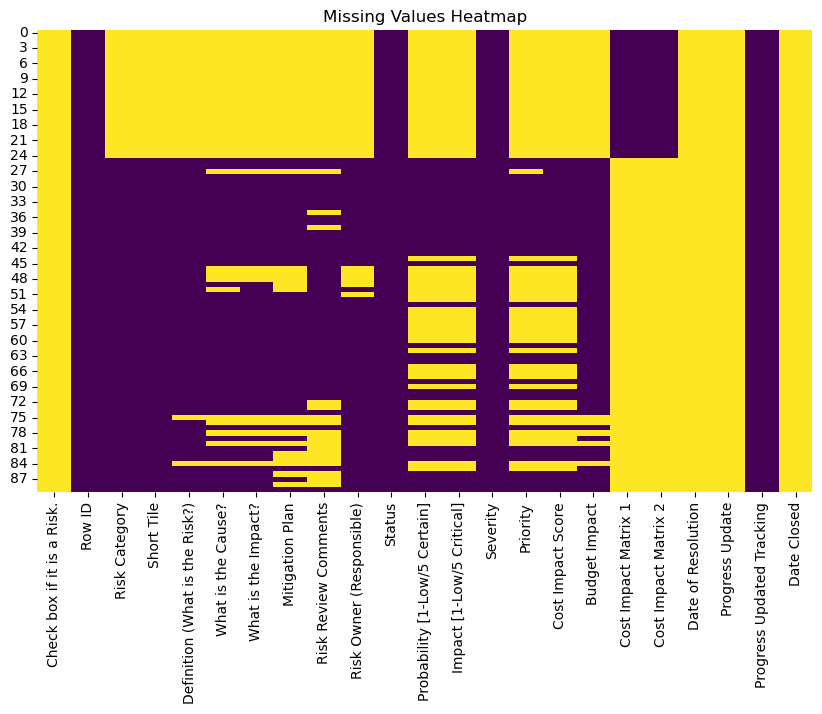

In [12]:
# Plotting missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


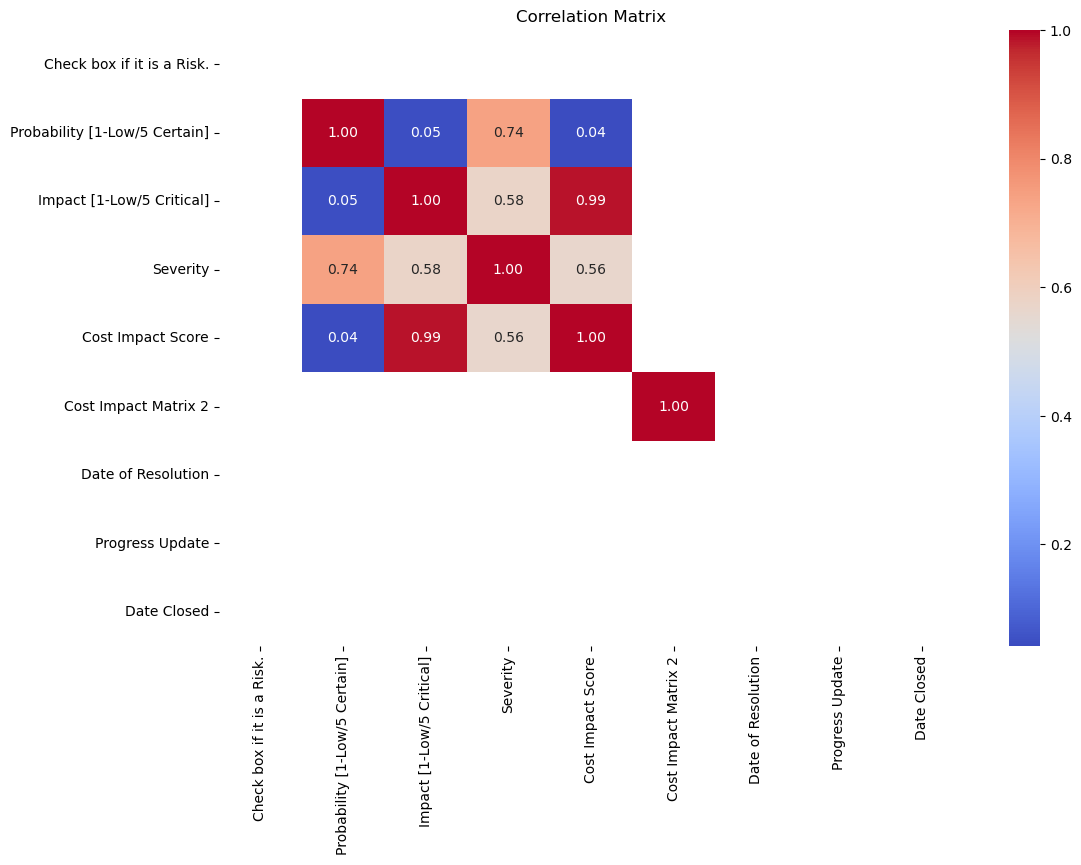

In [14]:
# Plotting correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. Category Distribution

In [15]:

# Calculate the distribution of the 'Risk Category' column
category_distribution = data['Risk Category'].value_counts()
print("\nRisk Category Distribution:\n", category_distribution)


Risk Category Distribution:
 Risk Category
External            18
Civil               15
Electrical           8
Mechanical           6
Site                 6
Security             4
Technology           4
Sustainability       2
Fire/Life Safety     2
Name: count, dtype: int64


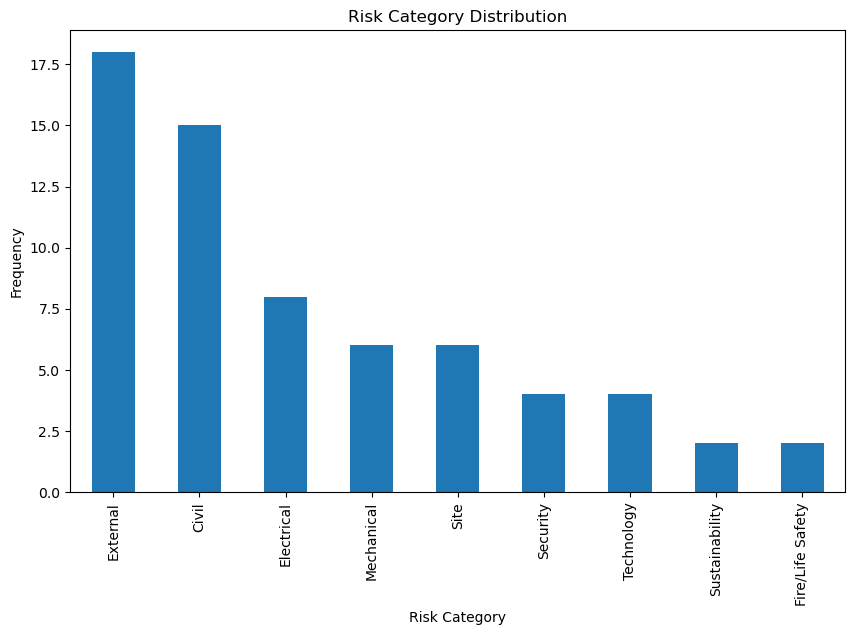

In [16]:
# Plotting risk category distribution
plt.figure(figsize=(10, 6))
category_distribution.plot(kind='bar')
plt.title('Risk Category Distribution')
plt.xlabel('Risk Category')
plt.ylabel('Frequency')
plt.show()

# 5. Cost Impact Distributions with additional plots


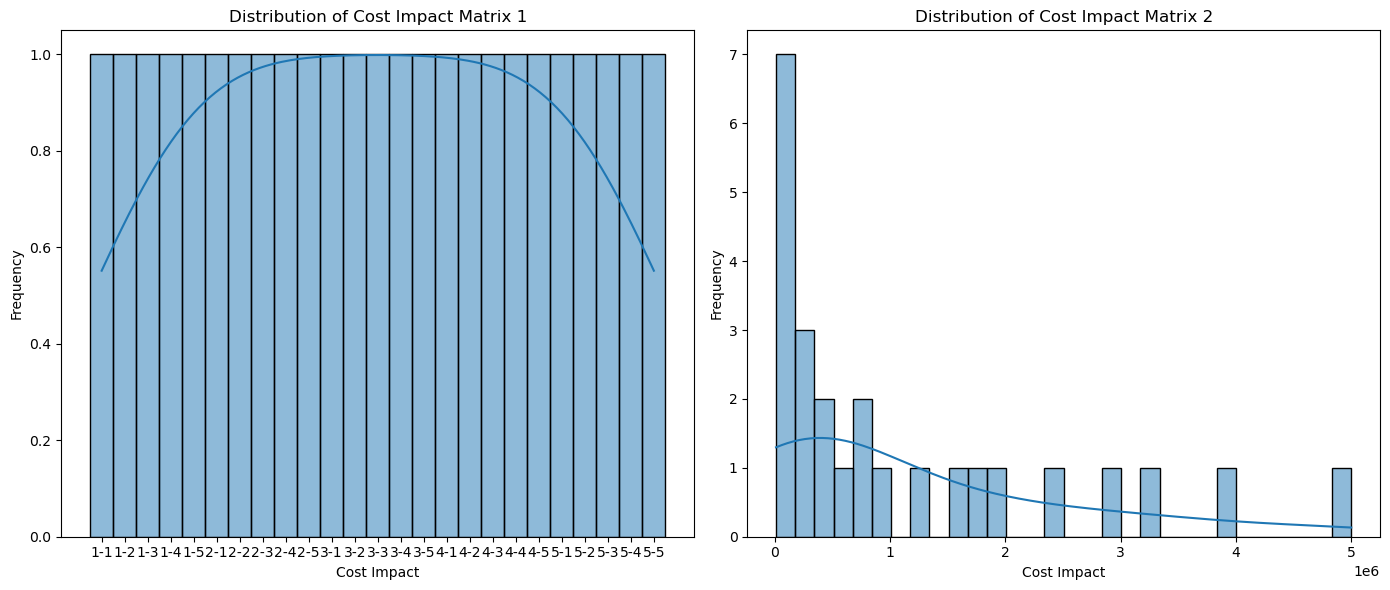

In [19]:
# Plot distributions for 'Cost Impact Matrix 1' and 'Cost Impact Matrix 2'
plt.figure(figsize=(14, 6))

for i, column in enumerate(['Cost Impact Matrix 1', 'Cost Impact Matrix 2'], 1):
    plt.subplot(1, 2, i)
    sns.histplot(data[column].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Cost Impact')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Monte Carlo Simulation

In [34]:
# Calculate Likely and Low values based on High values
data['High'] = data['Cost Impact Matrix 2']
data['Likely'] = data['High'] / 2
data['Low'] = data['Likely'] / 2

In [35]:
# Print the calculated values for verification
print("Calculated High, Likely, and Low values:\n", data[['High', 'Likely', 'Low']].head())

Calculated High, Likely, and Low values:
        High    Likely      Low
0   10000.0    5000.0   2500.0
1   30000.0   15000.0   7500.0
2   50000.0   25000.0  12500.0
3  100000.0   50000.0  25000.0
4  200000.0  100000.0  50000.0


In [43]:
# Define function for triangular distribution
def triangular_simulation(low, likely, high, size):
    return np.random.triangular(low, likely, high, size)

In [44]:
# Run Monte Carlo simulation for each risk
simulated_cost_impacts = []
for i in range(len(data)):
    low = data.loc[i, 'Low']
    likely = data.loc[i, 'Likely']
    high = data.loc[i, 'High']
    simulated_values = triangular_simulation(low, likely, high, n_simulations)
    simulated_cost_impacts.extend(simulated_values)


In [45]:
# Convert to numpy array for percentile calculation
simulated_cost_impacts = np.array(simulated_cost_impacts)

In [46]:
# Check if simulated_cost_impacts contains any NaN values
print(f"Any NaN values in simulated cost impacts: {np.isnan(simulated_cost_impacts).any()}")

Any NaN values in simulated cost impacts: False


In [47]:
# Calculate percentiles
p90 = np.percentile(simulated_cost_impacts, 90)
p70 = np.percentile(simulated_cost_impacts, 70)
p30 = np.percentile(simulated_cost_impacts, 30)

# Calculate total cost impact for percentage conversion
total_cost_impact = np.sum(data['High'])

# Calculate percentiles as percentages of total cost impact
p90_percentage = (p90 / total_cost_impact) * 100
p70_percentage = (p70 / total_cost_impact) * 100
p30_percentage = (p30 / total_cost_impact) * 100

# Print the calculated percentiles
print(f"P90: {p90:.2f} ({p90_percentage:.2f}%)")
print(f"P70: {p70:.2f} ({p70_percentage:.2f}%)")
print(f"P30: {p30:.2f} ({p30_percentage:.2f}%)")

P90: 1918920.07 (6.53%)
P70: 831327.26 (2.83%)
P30: 102615.55 (0.35%)


In [48]:
# Function to perform triangular simulation and calculate P-values
def calculate_p_values(row):
    low = row['Low']
    likely = row['Likely']
    high = row['High']
    simulated_values = np.random.triangular(low, likely, high, n_simulations)
    p90 = np.percentile(simulated_values, 90)
    p70 = np.percentile(simulated_values, 70)
    p30 = np.percentile(simulated_values, 30)
    return p90, p70, p30


In [49]:
# Apply the function to each row
data[['P90', 'P70', 'P30']] = data.apply(lambda row: pd.Series(calculate_p_values(row)), axis=1)

# Print the resulting dataframe with P-values
print("Data with P-values:\n", data[['High', 'Likely', 'Low', 'P90', 'P70', 'P30']].head())


Data with P-values:
        High    Likely      Low            P90            P70           P30
0   10000.0    5000.0   2500.0    8105.805444    6635.986747   4874.947719
1   30000.0   15000.0   7500.0   24169.845364   19859.607163  14539.425651
2   50000.0   25000.0  12500.0   40175.230658   33227.014140  24372.901986
3  100000.0   50000.0  25000.0   80949.808841   66484.765719  48668.084540
4  200000.0  100000.0  50000.0  160918.887536  133364.363836  97650.798903


C:\Users\hp\AppData\Local\Temp\ipykernel_8632\2108836175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['P90', 'P70', 'P30']] = data.apply(lambda row: pd.Series(calculate_p_values(row)), axis=1)
C:\Users\hp\AppData\Local\Temp\ipykernel_8632\2108836175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['P90', 'P70', 'P30']] = data.apply(lambda row: pd.Series(calculate_p_values(row)), axis=1)
C:\Users\hp\AppData\Local\Temp\ipykernel_8632\2108836175.py:2: SettingWithCopyWarning: 
A value is t

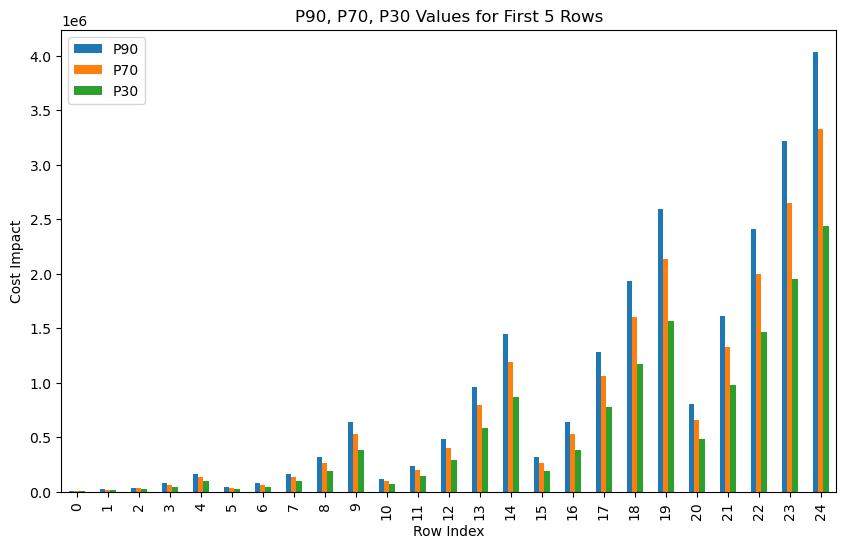

In [51]:
# Plotting the P-values for the first few rows as an example
data[['P90', 'P70', 'P30']].plot(kind='bar', figsize=(10, 6))
plt.title('P90, P70, P30 Values')
plt.xlabel('Row Index')
plt.ylabel('Cost Impact')
plt.show()

In [52]:
# Calculate P-values for each row
p_values = data.apply(lambda row: pd.Series(calculate_p_values(row)), axis=1)
p_values.columns = ['P90', 'P70', 'P30']

# Insert the calculated P-values into the dataframe
data = pd.concat([data, p_values], axis=1)

In [53]:
# Save the updated dataframe with P-values to a new Excel file
output_file_path = 'DF Data with P Values.xlsx'
data.to_excel(output_file_path, index=False)